<a href="https://colab.research.google.com/github/jherrerae/Food_Sales_Prediction/blob/main/Food_Sales_Prediction_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Jose Herrera
Food Sales Prediction Project
```



# **Week 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
filename='/content/drive/MyDrive/Coding Dojo/Classes/Datasets/sales_predictions.csv'

df=pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Week 2**

Data Cleaning

In [2]:
#number of rows and columns
df.shape

(8523, 12)

In [3]:
df.info()
#Analyze data types and where are missing values.
#Missing values are on Item_Weight, Outlet_Size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
##Remove duplicates
df.duplicated().sum()

#There are no duplicated values in the dataset.

0

In [5]:
#Missing values are in columns 1,8.
#1 is weight which is numerical, 17% of the data is missing
#2 is Outlet Size which is categorical, 29% of the data is missing

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



```
##Process to fill missing values Outlet_Size
 ```



In [6]:
df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'],dropna=False)['Item_Fat_Content'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           528
                   Tier 3                NaN             555
Supermarket Type1  Tier 1                Medium          930
                                         Small           930
                   Tier 2                Small           930
                                         NaN            1855
                   Tier 3                High            932
Supermarket Type2  Tier 3                Medium          928
Supermarket Type3  Tier 3                Medium          935
Name: Item_Fat_Content, dtype: int64

Based in the groupby done above. The missing values for Outlet_Size are in the following groups Grocery Store_Tier 3 and Supermarket Type1_Tier2.
The following process will be follow to fill the values:

Since Outlet_Size is a categorical value, we will use the mode and some groups to fill it out.

First, for Grocery Store given that for Tier 3 we don't have any data we will use the other Tier inside grocery store which are Tier 1 and everything is Small. Therefore for Grocery Store_Tier3 all the missing values will be small.

Second, for Supermarket Type1, everything inside Tier 2 is small and if we add Tire 1 and 3 still the mode is Small. Therefore for Supermarket Type1_Tier 2 all the missing values will be small.

In [7]:
def fill_missing_values(Type,location,size):
  if (Type=="Grocery Store" and location=="Tier 3"):
      return "Small"
  elif (Type=="Supermarket Type1" and location=="Tier 2"):
      return "Small"
  else:
    return size


df['Outlet_Size'] = df.apply(lambda x: fill_missing_values(x['Outlet_Type'],x['Outlet_Location_Type'],x['Outlet_Size']),axis=1)


In [8]:
df.isna().sum()
#Missing values replaced for Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
filter_NAN_weigth=df["Item_Weight"].isnull()

df_NAN_weight=df[filter_NAN_weigth]


df_NAN_weight.shape

df_NAN_weight.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Establishment_Year  Outlet_Type        Outlet_Location_Type
1985                       Grocery Store      Tier 1                  528
                           Supermarket Type3  Tier 3                  935
Name: Outlet_Type, dtype: int64

In [10]:
filter_weigth=df["Item_Weight"].notnull()

df_weight=df[filter_weigth]

df_weight

df_weight.shape

df_weight.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Establishment_Year  Outlet_Type        Outlet_Location_Type
1987                       Supermarket Type1  Tier 3                  932
1997                       Supermarket Type1  Tier 1                  930
1998                       Grocery Store      Tier 3                  555
1999                       Supermarket Type1  Tier 1                  930
2002                       Supermarket Type1  Tier 2                  929
2004                       Supermarket Type1  Tier 2                  930
2007                       Supermarket Type1  Tier 2                  926
2009                       Supermarket Type2  Tier 3                  928
Name: Outlet_Type, dtype: int64

After analyzing the missing and non-missing values for Item_Weight none feasible groupings where found. Therefore a simple replace will be made using the mean of the weight.


In [11]:
mean_weight=df["Item_Weight"].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [12]:
df.isna().sum()
#Missing values replaced for Item_Weight
#No missing values left

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for inconsistencies in the different categories

In [13]:
df.groupby(['Item_Fat_Content'],dropna=False)['Outlet_Size'].count()

#Item_Fat_Content has several inconsistencies in the naming convention

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Outlet_Size, dtype: int64

In [14]:
#Correct naming convention for Item_Fat_Content
def renaming(word):
  if (word=="LF"):
      return "Low Fat"
  elif (word=="low fat"):
      return "Low Fat"
  elif  word=="reg":
      return "Regular"
  else:
      return word


df['Item_Fat_Content'] = df.apply(lambda x: renaming(x['Item_Fat_Content']),axis=1)


In [15]:
df.groupby(['Item_Fat_Content'],dropna=False)['Outlet_Size'].count()
#Item_Fat_Content rename correctly

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Outlet_Size, dtype: int64

In [16]:
df.agg(
    {
        "Item_Weight": ['mean',"min", "max"],
        "Item_Visibility": ['mean',"min", "max"],
        "Item_MRP": ['mean',"min", "max"],
        "Outlet_Establishment_Year": ['mean',"min", "max"],
        "Item_Outlet_Sales": ['mean',"min", "max"],
    }
)

#description of numerical variables

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Dictionary

Variable Name	Description

**Item_Identifier**	Unique product ID

**Item_Weight**	Weight of product

**Item_Fat_Content**	Whether the product is low fat or regular

**Item_Visibility**	The percentage of total display area of all products in a store allocated to the particular product

**Item_Type**	The category to which the product belongs

**Item_MRP**	Maximum Retail Price (list price) of the product

**Outlet_Identifier**	Unique store ID

**Outlet_Establishment_Year**	The year in which store was established

**Outlet_Size**	The size of the store in terms of ground area covered

**Outlet_Location_Type**	The type of area in which the store is located

**Outlet_Type**	Whether the outlet is a grocery store or some sort of supermarket

**Item_Outlet_Sales**	Sales of the product in the particular store. This is the target variable to be predicted.

In [18]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


# Week 3

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

**Analysis**
Based in the data dictionary the Item Identifier(it is an ID) will not be analyzed.

First, the categorical variables will be analyzed using histograms

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size

Outlet_Location_Type

Outlet_Type

<function matplotlib.pyplot.show>

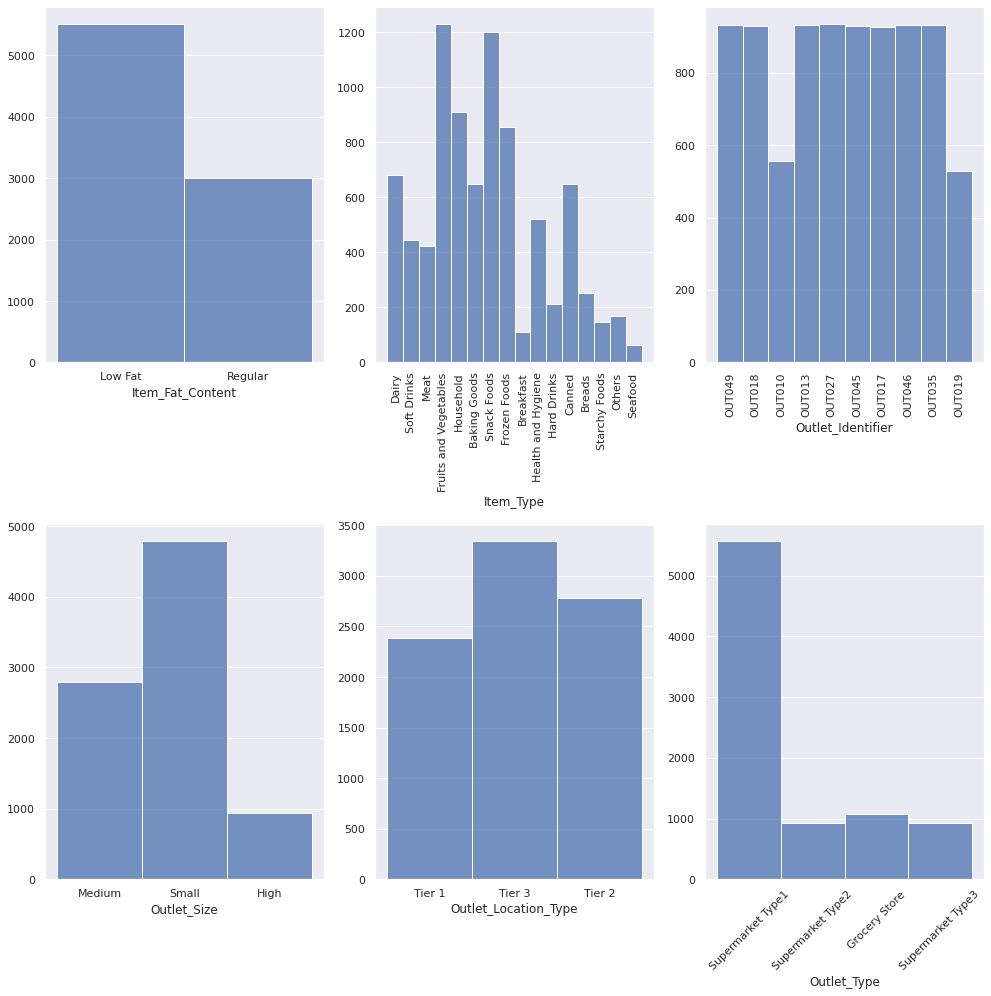

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,14)})

fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=3)

a=sns.histplot(df['Item_Fat_Content'],ax=axs[0,0])
b=sns.histplot(df['Item_Type'],ax=axs[0,1])
c=sns.histplot(df['Outlet_Identifier'],ax=axs[0,2])
d=sns.histplot(df['Outlet_Size'],ax=axs[1,0])
e=sns.histplot(df['Outlet_Location_Type'],ax=axs[1,1])
f=sns.histplot(df['Outlet_Type'],ax=axs[1,2])

graphs=[a,b,c,d,e,f]
for graph in graphs:
    graph.set(ylabel='') 
    graph.xaxis.grid(False)
b.tick_params(axis='x', rotation=90)
c.tick_params(axis='x', rotation=90)
f.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show




Analyzing the image above:

Item_Fat_Content-> most of the products are low fat

Item_Type-> most of the products are categorized as Fruits and vegetables,household, snaks Food and frozen foods

Outlet_Identifier-> all products are well distributed between all the stores

Outlet_Size-> More 50% of the are in small outlet

Location_Type->location is distributed even between the 3 tiers

Outlet_type-> more than 50% values are supermarket_type_1


The next part of the analysis will be for the numerical variables

<function matplotlib.pyplot.show>

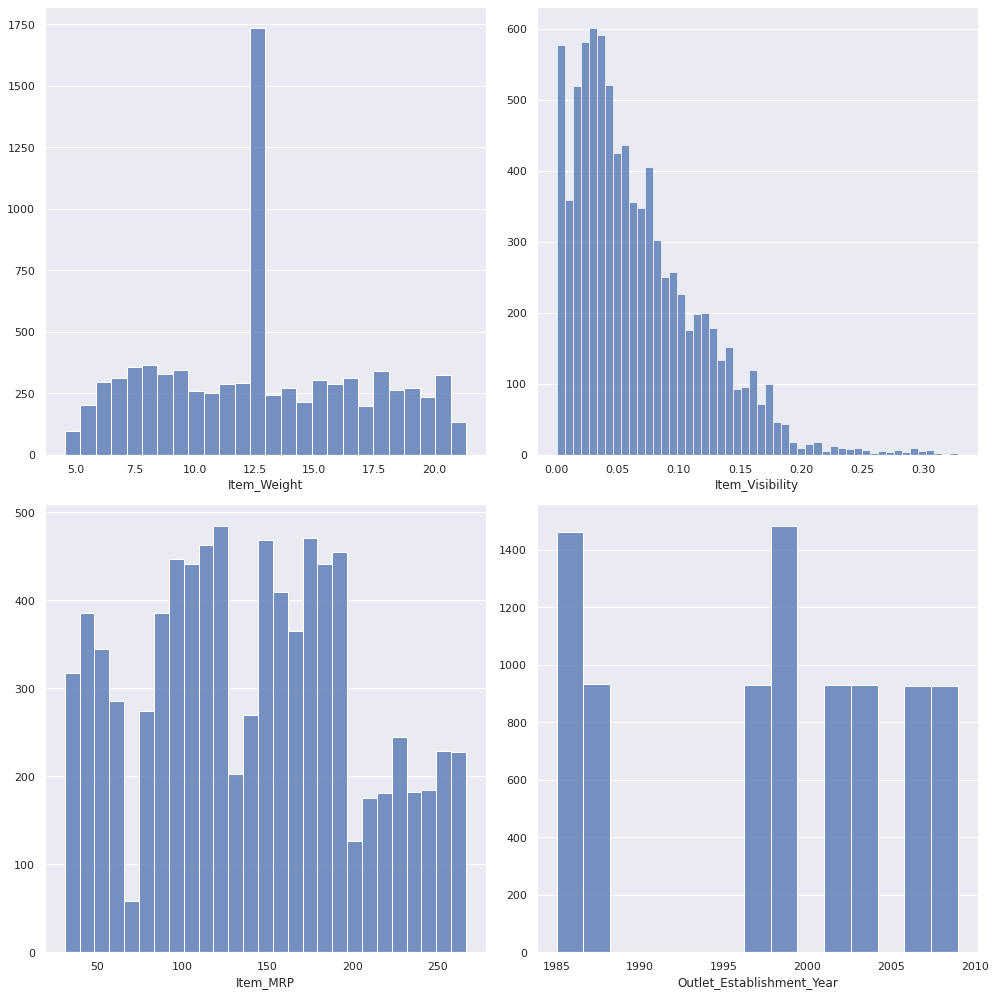

In [100]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=2)

a=sns.histplot(df['Item_Weight'],ax=axs[0,0])
b=sns.histplot(df['Item_Visibility'],ax=axs[0,1])
c=sns.histplot(df['Item_MRP'],ax=axs[1,0])
d=sns.histplot(df['Outlet_Establishment_Year'],ax=axs[1,1])

graphs=[a,b,c,d]
for graph in graphs:
    graph.set(ylabel='') 
    graph.xaxis.grid(False)


fig.tight_layout()
plt.show

Item_Weight-> is distributed even except for a value around 12.5 that is the most repeated value (following a "normal" dsitribution")

Item_Visibility is skewed right meaning that most of the produts have a low visibility

Max Retail Price-> more or less even distribution of prices'

Year->not a lot to describe from the year variable it can be consider a categorical variable

Box plots of Numerical Variables

<function matplotlib.pyplot.show>

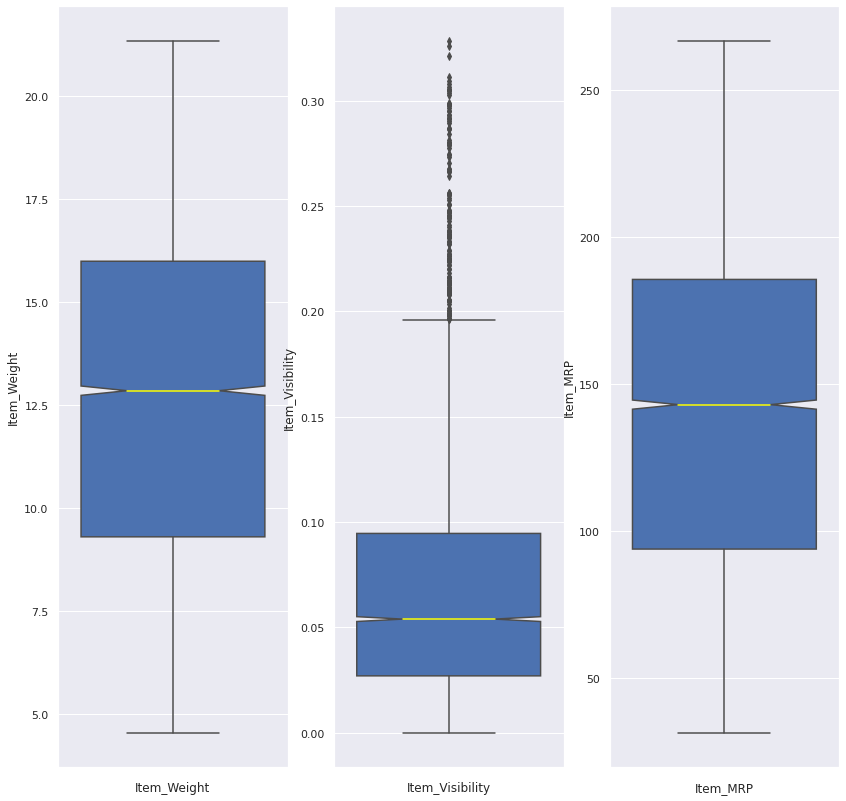

In [103]:
fig, axs2 = plt.subplots(1,3,squeeze=False)
a=sns.boxplot( y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,0])
b=sns.boxplot( y='Item_Visibility', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,1])
c=sns.boxplot( y='Item_MRP', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,2])

a.set(xlabel='Item_Weight',)
b.set(xlabel='Item_Visibility',)
c.set(xlabel='Item_MRP',)

plt.show

Looking at the box plots, the previous analysis with the histograms can be confirmed.

Item Weight media is around 12.5, there are lot of outliers in item visibility causing the skewed rigth. 

Quick Boxplots comibining categorical and numerical value

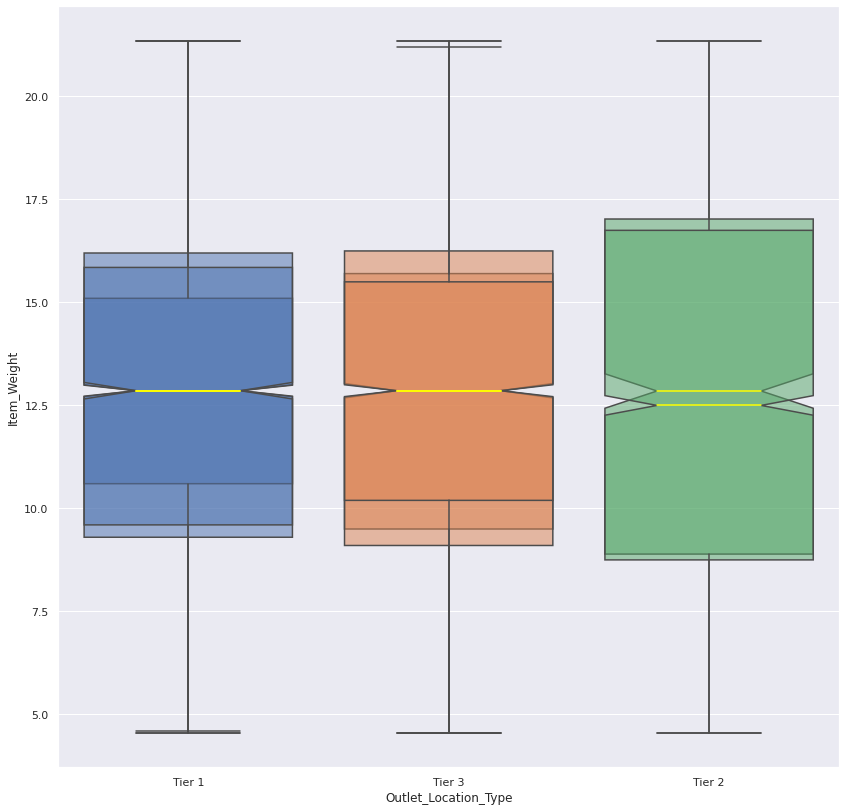

In [110]:
a=sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )

b=sns.boxplot(x='Outlet_Size', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )
c=sns.boxplot(x='Outlet_Location_Type', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )
list=[a,b,c]

for x in list:
  for patch in x.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))


Witht the above boxplot,nothing new is found same distribution is followed

Heated Maps

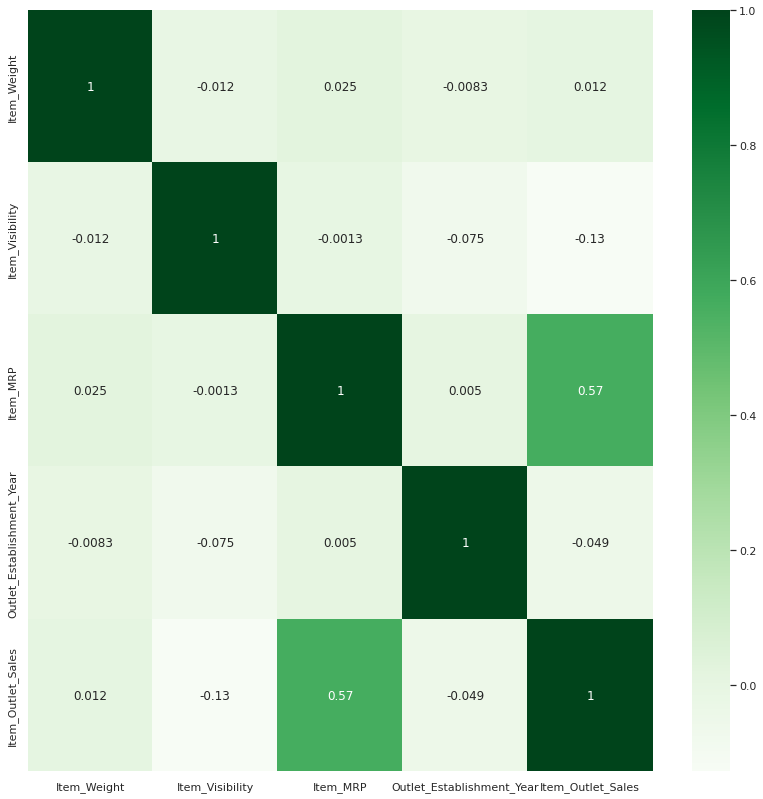

In [102]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

The only correlation is between Max Retail price and the Outlet Sales, which doesn't tell a lot because it is kind of obvious that if the price increase the sales will go up.